# Proejct 1: Edge Detection/Hough Transform

### What to Submit
Submit this iPython Notebook--containing all your code for the programming exercises below--on [learning suite](https://learningsuite.byu.edu/).

Your notebook file should produce the relevant plots and also provide a short write-up with answers to the questions in parts A-B.

Please also fill in here the time that each part took you:
* A1. Gradient Magnitude: <span style="color:red;">3 Hours</span>
* A2. Gradient Orientation: <span style="color:red;">1.5 Hours</span>
* A3. Laplacian Zero-crossings: <span style="color:red;">3 Hour</span>
* A4. Gradient Magnitude + Zero-crossings: <span style="color:red;">2 Hours</span>
* B. Hough Transform (Circles):  <span style="color:red;">10 Hours</span>

Note that the images referred to and needed for this project are contained in the zip file provided (in the same directory as this notebook file).  <i>Please use the files as though they are in the same directory.  We will drop your notebook file into our folder and run it.</i>

### Programming Exercises
Make sure to read through all of the assignment and plan accordingly.  The first part is relatively easy, but you should allow adequate time for the second part.

The main goal is to investigate edge detection and the Hough transform as discussed in Sections 4.2 and 4.3 of [Szeliski](http://szeliski.org/Book "Computer Vision: Algorithms and Applications").

#### Part A: Edge Detection (32 points)
For each of the following four parts, try out your code first on the <span style="color:orange;">2D_White_Box.png</span> image, then on the more complicated <span style="color:orange;">blocks.png</span> image.

Note: Many of the images will contain negative numbers or numbers larger than 255.  Make sure you approprately scale the output images to display all of the information.  Hint: try mapping negative values to [0,128) and positive values to (128,255].

2D_White_Box.png:
![alt 2D_White_Box.png](2D_White_Box.png)

blocks.png:
![alt blocks.png](blocks.png)

<br><br><b>A1. Gradient Magnitude</b> - Compute the gradient magnitude image for a grayscale image.  Apply a suitable threshold to find edge points--play with the threshold to find the "best" solution.  How well does this seem to work?  Feel free to use any preprocessing you wish to prior to edge detection.

Populating the interactive namespace from numpy and matplotlib


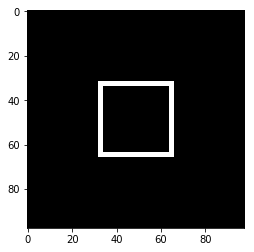

In [1]:
# Part 1. Compute the Gradient Magnitude

%pylab inline
import cv2 as cv2
import scipy.signal

#EASY WAY
def gradient_magnitude2(image):
    img = np.dot(image[...,:3], [.299, .587, .114])
    new_img = np.zeros(img.shape)
    output_imgX = np.zeros(img.shape)
    output_imgY = np.zeros(img.shape)
    
    filterX = np.array([[-1,0,1],
                       [-2,0,2],
                       [-1,0,1]])

    filterY = np.array([[1, 2, 1],
                       [0, 0, 0],
                       [-1,-2,-1]])
    
    output_imgX = scipy.signal.convolve2d(img, filterX)
    output_imgY = scipy.signal.convolve2d(img, filterY)
    output_img =  np.sqrt(output_imgX**2 + output_imgY**2)
    return output_img, output_imgX, output_imgY
   
img_GM = cv2.imread('2D_White_Box.png')
new_img_GM, derivX, derivY = gradient_magnitude2(img_GM)
plt.imshow(new_img_GM,cmap="gray",vmin=0,vmax=255)


# #HARD WAY
# def gradient_magnitude(image):
#     img = np.dot(image[...,:3], [.299, .587, .114])

#     new_img = np.zeros(img.shape)
#     derivX = np.zeros(img.shape)
#     derivY = np.zeros(img.shape)
#     img_shape = img.shape

#     filterX = np.array([[-1,0,1],
#                        [-2,0,2],
#                        [-1,0,1]])

#     filterY = np.array([[1, 2, 1],
#                        [0, 0, 0],
#                        [-1,-2,-1]])

#     for y in range(1, img_shape[0]-1):
#         for x in range(1, img_shape[1]-1):
#             dX = 0.0
#             dY = 0.0 

#             for ky in range(3):
#                 for kx in range(3):
#                     dX = dX + np.dot(filterX[ky,kx], img[y+ky -1, x+kx-1])
#                     dY = dY + np.dot(filterY[ky,kx], img[y+ky -1, x+kx-1])
#             derivX[y,x] = dX
#             derivY[y,x] = dY
#             new_img[y,x] = (dX**2 + dY**2)**.5
#             numpy.sqrt(derivX**2 + derivX**2)
#     return new_img, derivX, derivY



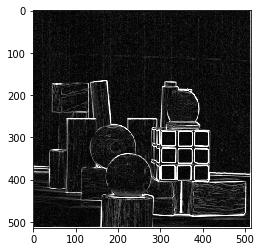

In [2]:
img2_GM = cv2.imread('blocks.png')
new_img2_GM, derivX1, derivY2 = gradient_magnitude2(img2_GM)
plt.imshow(new_img2_GM,cmap="gray",vmin=0,vmax=255)

<br><b>A2. Gradient Orientation</b> - Compute a gradient orientation image for a grayscale image.  Encode the orientations as intensity using any method you wish. (Just make sure to document it.)  Hint: use atan2(), not atan(), to do the angle calculation.

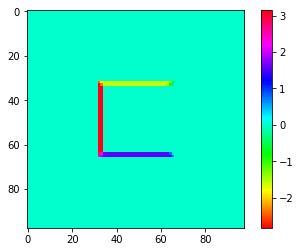

In [3]:
# Part 2. Compute the Gradient Orientation

from scipy import signal
    
def gradient_orientation(image):
    img = np.dot(image[...,:3], [.299, .587, .114])
    new_img = np.zeros(img.shape)
    output_imgX =np.zeros(img.shape)
    output_imgY =np.zeros(img.shape)
    
    filterX = np.array([[-1,0,1],
                       [-2,0,2],
                       [-1,0,1]])

    filterY = np.array([[-1,-2,-1],
                       [0, 0, 0],
                       [1,2,1]
                       ])
    
    output_imgX = scipy.signal.convolve2d(img, filterX)
    output_imgY = scipy.signal.convolve2d(img, filterY)
    output_img_ori =  np.arctan2(output_imgY,output_imgX)
    
    return output_img_ori
    

image = cv2.imread('2D_White_Box.png')
new_img_GO33 = gradient_orientation(image)
plt.imshow(new_img_GO33,cmap="hsv")
plt.colorbar()


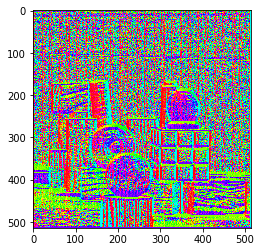

In [4]:
image22 = cv2.imread('blocks.png')
new_img_GO22 = gradient_orientation(image22)
plt.imshow(new_img_GO22,cmap="hsv")


<br><b>A3. Laplacian Zero-Crossings</b> - Apply a 3x3 Laplacian kernel to blocks and find the zero crossings.



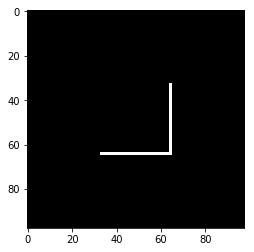

In [5]:
# Part 3. Find the Zero Crossings

def laplacian(image):
    img = np.dot(image[...,:3], [.299, .587, .114])
#     image_L2 = cv2.blur(img, (3,3))
    new_img = np.zeros(img.shape)
    secondDeriv =np.zeros(img.shape)

    
    laplacianFilter = np.array([[0,1,0],
                        [1,-4,1],
                        [0,1,0]])

    secondDeriv = scipy.signal.convolve2d(img, laplacianFilter)
    
    return secondDeriv


def zero_crossing(secondDeriv):
    img_shape = secondDeriv.shape
    outputt = np.zeros(secondDeriv.shape)
    for x in range(1, img_shape[0]-1):
        for y in range(1, img_shape[1]-1):
            p1 = secondDeriv[x,y]
            p2 = secondDeriv[x,y+1]
            p4 = secondDeriv[x+1,y]
            
            d1 = p2 - p1
            d2 = p4 - p1
            thresh = 0
            
            if (d1 > thresh and p1*p2 < 0):
                outputt[x,y] = 255
            elif (d2 > thresh and p1*p4 < 0):
                outputt[x,y] = 255

        
#             if(p1 > thresh):
#                 if(p2< -thresh or p4< -thresh):
#                     outputt[x,y] = 255
#             elif(p1 < -thresh):
#                 if(p2>thresh or p4>thresh):
#                     outputt[x,y] = 255

    return outputt


image_L = cv2.imread('2D_White_Box.png')
new_img_L = laplacian(image_L)
new_zero_crossing = zero_crossing(new_img_L)
plt.imshow(new_zero_crossing,cmap="gray",vmin=0,vmax=255)


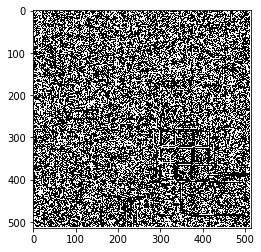

In [6]:
image_L2 = cv2.imread('blocks.png')
new_img_L2 = laplacian(image_L2)
new_zero_crossing2 = zero_crossing(new_img_L2)
plt.imshow(new_zero_crossing2,cmap="gray",vmin=0,vmax=255)

## TA Check Here:
## David Checked Zero Crossings. We can't figure out what is wrong.

<br><b>A4. Combine Gradient Magnitude and Zero-Crossings</b> - Use the gradient magnitude image computed in item 1 to select Laplacian zero-crossings in part 3 that correspond to points with gradients higher than some threshold that you determine.  Adjust your threshold to find the best solution.


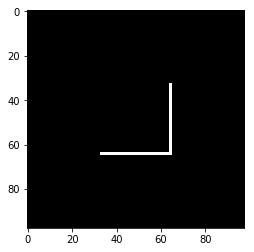

In [7]:
# Part 4. Final Solution
img_shape = new_zero_crossing.shape
output4 = np.zeros(new_zero_crossing.shape)
for y in range(1, img_shape[0]-1):
    for x in range(1, img_shape[1]-1):
        if(new_zero_crossing[x,y]> 0.0 and new_img_GM[x,y]>10):
            output4[x,y] = 255
        else:
            output4[x,y] = 0


plt.imshow(output4,cmap="gray",vmin=0,vmax=255)

# Show the results on blocks image


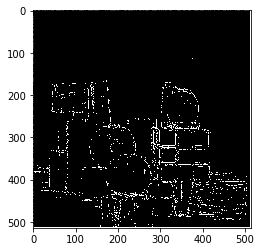

In [8]:
img_shape2 = new_zero_crossing2.shape
output42 = np.zeros(new_zero_crossing2.shape)
for y in range(1, img_shape2[0]-1):
    for x in range(1, img_shape2[1]-1):
        if(new_zero_crossing2[x,y]> 100 and new_img2_GM[x,y]>50):
            output42[x,y] = 255
        else:
            output42[x,y] = 0


plt.imshow(output42,cmap="gray",vmin=0,vmax=255)

##### Part A: Write-up

<span style="color:red">This project was hard having never taken 355, but the reviews helped. So, A1 I did it all with for loops iterating through the image and multiplying it by the sobel kernal to get the first derivitive for both x and y. And then I learned about convolution using signal.convolv2d and that made it a lot faster. The gradient magnitude can be calculated by taking the square root of dx^2 and dy^2. In math that would be the distance. 
     Then I did A2 which was a little easier than A1 to write, because it's basically the same thing, just instead of taking the square root of dx and dy, you take the arctangent which gives you the orientation or in math it would be an angle.
    To do the laplacian, I simply multiplied it by the laplacian kernal and that gave me the second derivitive of the image which I could then parse through and look for places it went from positive to negative to figure out where the zero crossings were. I tried multiple crossings, but as you can see from this notebook, the TA David walked through it with me and we couldn't figure out what was happening with the laplacian so he said to move on and he'd give full points because we both couldn't find the error and the A4 should work if I had the correct A3. Anyway, the zero crossing gave me the locaitons where the image started either going from light to dark or dark to light.
    Then to combined them to get the final rendering which I believe is too spotted because of the laplacian. What it should output is the anywhere where there is a zero crossing and a high magnitude, it should output white. 



</span>

## This next portion the code takes a while to run


<br><br><br>
#### Part B: Hough Transform (68 points)
Use the Hough transform to find all of the circular shapes in a color image.  They occur in three (approximate) sizes: 32, 64, and 96 pixels in diameter.  Try it out first on the simple <span style="color:orange;">simplecircle.png</span> image, then on the more complicated <span style="color:orange;">circles.png</span> image.

After finding maxima in the accumulator(s), write out a list of positions and sizes (small, medium, or large) for each circle.  Be aware that for some of the circles the center is outside the image--you should still be able to identify where it is.

Some of the cases are tricky--don't panic if you don't get them all at first. Keep trying to get as many as possible while generatign as few possible false positives (erroneous identifications).

About 40 of the 68 points will be on how many of the circles you can detect (1-2 false positives are okay). To know what you should be shooting for, there are:
* 5 small circles (blue/cyan, light gray, purple clipped on the left, two eyes of the pumpkin).
* 12 medium circles (green one in the top left corner, orange/magenta/pink near top/left, yello, magenta, purple/cyan, medium grey in "target", med blue clipped on the left, red/white/blue on lower right).
* 3 Large circles (black in target, black/dark blue on right, and orange pumpkin).

For the <span style="color:orange;">circles.png</span> file, and each of the 3 diameters, show (1) the accumulation array and (2) the <span style="color:orange;">circles.png</span> with the detected circles outlined.  This would be a total of 6 figures (3 diameters with two plots each).

This will be graded based on how well your method performs and how innovative your solution is. **In the write-up, describe any improvements/optimizations you made from the vanilla Hough transform**.

simplecircle.png:
![alt simplecircle.png](simplecircle.png)
circles.png:
![alt circles.png](circles.png)

In [9]:
#Gradient Magnitude with out Greying
def gradient_magnitude3(img):
    new_img = np.zeros(img.shape)
    output_imgX = np.zeros(img.shape)
    output_imgY = np.zeros(img.shape)
    
    filterX = np.array([[-1,0,1],
                       [-2,0,2],
                       [-1,0,1]])

    filterY = np.array([[1, 2, 1],
                       [0, 0, 0],
                       [-1,-2,-1]])
    
    output_imgX = scipy.signal.convolve2d(img, filterX)
    output_imgY = scipy.signal.convolve2d(img, filterY)
    output_img =  np.sqrt(output_imgX**2 + output_imgY**2)
    return output_img, derivX, derivY

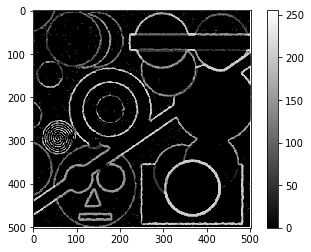

In [10]:
#Preproccesing 
image = cv2.imread('../proj1-edges-hough/circles.png')
image_L2 = cv2.blur(image, (6,6))
red_img1 = image_L2[:,:,0]
red_img = cv2.blur(red_img1, (4,4))
green_img1 = image_L2[:,:,1]
green_img = cv2.blur(green_img1, (4,4))
blue_img1 = image_L2[:,:,2]
blue_img = cv2.blur(blue_img1, (4,4))
gray_img1 = np.dot(image[...,:3], [.299, .587, .114])
gray_img = cv2.blur(gray_img1, (4,4))

gradient_red_img, derivX, derivY = gradient_magnitude3(red_img)
gradient_green_img, derivX, derivY = gradient_magnitude3(green_img)
gradient_blue_img, derivX, derivY = gradient_magnitude3(blue_img)
gradient_gray_img, derivX, derivY = gradient_magnitude3(gray_img)

def sharpen(image_to_sharpen):
    img_shape = image.shape
    circ_img = np.zeros(image_to_sharpen[0].shape)
    for y in range(2, img_shape[0]-1):
        for x in range(2, img_shape[1]-1):
            if(image_to_sharpen[y,x] > 100):
                image_to_sharpen[y,x] = 255
            else:
                image_to_sharpen[y,x] = 0
    return image_to_sharpen

gradient_red_img = sharpen(gradient_red_img)
gradient_green_img = sharpen(gradient_green_img)
gradient_blue_img = sharpen(gradient_blue_img)
gradient_gray_img = sharpen(gradient_gray_img)

test = np.add(gradient_gray_img, gradient_blue_img)
test2 = np.add(test, gradient_green_img)
test3 = np.add(gradient_red_img,test2)/5
plt.imshow(test3,cmap='gray',vmin=0, vmax=255)
plt.colorbar()



In [ ]:
# Part B - Hough Transform - code below
def find_circles(r):
    img_shape = image.shape
    circ_img = np.zeros([img_shape[0] + r, img_shape[1] + r])
    print(circ_img.shape)
    for y in range(10, img_shape[0]-10):
        for x in range(10, img_shape[1]-10):
            if(test3[y,x] > 20):
                for ky in range(r):
                    for kx in range(r):
                        distance = ((kx)**2 + (ky)**2)**.5 
                        if(int(distance) == r):
                            circ_img[y+ky,x+kx] += 1;
                            circ_img[y-ky,x-kx] += 1;
                            circ_img[y+ky,x-kx] += 1;
                            circ_img[y-ky,x+kx] += 1;
    return circ_img

return_image1 = find_circles(32)

plt.imshow(return_image1,cmap='gray') 
plt.colorbar()

# this is my code to make it run faster
# def find_circles2(r):
#     circle_slicer = np.zeros([r,r])
#     ceny = int(r/2)
#     cenx = int(r/2)
#     for ky in range(int(r/2)):
#         for kx in range(int(r/2)):
#             distance = ((kx)**2 + (ky)**2)**.5 
#             if(int(distance) == int(r/2)):
#                 print('hey')
#                 circle_slicer[ceny+ky,cenx+kx] += 1;
#                 circle_slicer[ceny-ky,cenx-kx] += 1;
#                 circle_slicer[ceny+ky,cenx-kx] += 1;
#                 circle_slicer[ceny-ky,cenx+kx] += 1;
#     img_shape = image.shape
#     circ_img = np.zeros([img_shape[0] + r, img_shape[1] + r])
# #     plt.imshow(circle_slicer,cmap='gray') 
# #     plt.colorbar()
#     for y in range(r, img_shape[0]-r):
#         for x in range(r, img_shape[1]-r):
#             if(test3[y,x] > 20):
#                 if((x < 16 or (x+16) > img_shape[1]-1)) or (y < 16 or (y+16) > img_shape[1]-1):
#                     tree =3 
#                 else:
#                     circ_img[y-int(r/2):y+int(r/2), x-int(r/2):x+int(r/2)] += circle_slicer
#     return circ_img

# return_image1 = find_circles2(32)

# plt.imshow(return_image1,cmap='gray') 
# plt.colorbar()


(532, 532)


(564, 564)


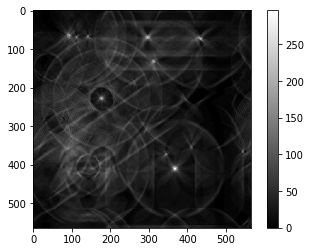

In [59]:
return_image2 = find_circles(64)
plt.imshow(return_image2,cmap='gray')
plt.colorbar()

(596, 596)


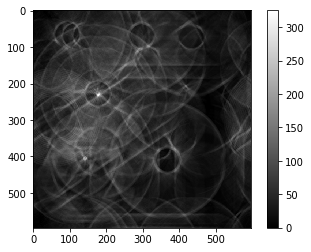

In [18]:
return_image3 = find_circles(96)
plt.imshow(return_image3,cmap='gray')
plt.colorbar()

In [14]:
#Find the centers and stuff
def find_centers(circ_img, r, tr, dr):
    centers = []
    img_shapex = circ_img.shape
    ps = 25
#     tr = r*2.2
#     dr = r*.00076
    print(circ_img.shape)    
    for t in range(ps, img_shapex[0]-ps):
        for m in range(ps, img_shapex[1]-ps):            
            if(tr< circ_img[t,m]):
                tank = np.zeros([ps,ps])
                tank = circ_img[t-ps:t+ps, m-ps:m+ps]
                large = np.argmax(tank)
                av = np.average(tank)
                if((av/large) < dr):
                    centers.append([t,m])

    return centers

def build_circles(centers, image, r):
    for c in centers:
        cv2.circle(image, (c[1],c[0]), r, (0,255,0), thickness=3, lineType=8, shift=0)

    return image

(532, 532)


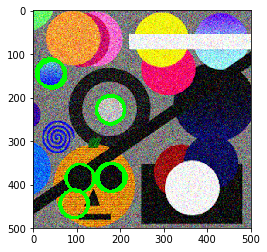

In [15]:
cents = find_centers(return_image1, 32, 75.0, 0.023)
imagex = cv2.imread('circles.png')
finalImage1 = build_circles(cents,imagex,32)
plt.imshow(cv2.cvtColor(imagex, cv2.COLOR_BGR2RGB))

(564, 564)


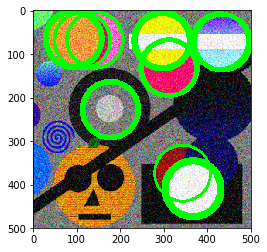

In [16]:
cents2 = find_centers(return_image2, 64, 140.0, 0.060)
imagex2 = cv2.imread('circles.png')
finalImage2 = build_circles(cents2,imagex2,64)
plt.imshow(cv2.cvtColor(imagex2, cv2.COLOR_BGR2RGB))

(596, 596)


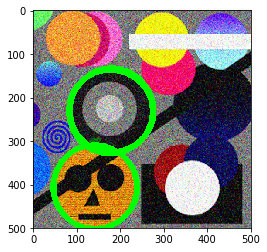

In [17]:
cents3 = find_centers(return_image3, 96, 200, .8)
imagex3 = cv2.imread('circles.png')
finalImage3 = build_circles(cents3,imagex3,96)
plt.imshow(cv2.cvtColor(imagex3, cv2.COLOR_BGR2RGB))

##### Part B: Write-up

## It takes some time for it to run, don't give up on it!! Thanks!
## 6 minutes radius 96 because I have too many for loops.
<span style="color:red">So, I know that 6 minutes is a long run time, I've been working on it. I've been playing with different thresholds for hours now and:
    I can get the larger circles with kernal size = 25, a threshold of 200 and difference in average of around .8 
    I can get the smaller circles with kernal size = 25, a threshold of 75 and a differnce in average of around .023
    I've found a threshold that gets a lot of them using a ratio of the ranges and using that to find a threshold without having to pass into the method a specific threshold. You can see those are commented out under tr and dr. But, after Dr. Ferrall said we can pass different thresholds in, now I'm passing in different thresholds for the differnt sizes.
   I think the reason I can't get all of them on the same ratio of threshold is that the larger the diameter the more votes there are throughout the image and so the places that overalap are higher and the threshold's don't work the same as the smaller diameter. I was able to get all the circles, I just couldn't figure out a threshold. He discussed in class taking the argmax of the whole image and then using that compared to the argmax of the nearest neighbors. That may help.
    Basically, the way that I did the hough transform was I first took the image and blurred it and then I split it into red, green, blue and gray channels, I then found the gradient magnitudes for each of them and I add them all together to get one image weighted based on all 4 different channels (including gray). I then created a method that takes in a radious, and goes pixel by pixel and if a pixel is above a threshold, then it would create a mini array of size of the radious I passed in. When the distance from the current pixel was equal to the radious I gave it a vote by adding 1 to my accumulator(called circ_img). After iterating over all the image, It gave me the total accumulator for the image.   
Next, I iterated over the accumulator pulled out a matrix of size 25 by 25 at each pixel and found the largest value and the average and if the largest value was significantly larger than the average, I new it was a center. The goal was to generate less false positives with spiral.    
In the end, after I had all the centers, I used openCV's cv2.circle to make the circles. 
One thing i would have liked to do if i had more time, is to take each center an choose only one point instead of generating a circle for every pixel that meets a certain threshold. 
</span>

